In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners/notebook

A. SUPERVISED LEARNING
Supervised learning: It uses data that has labels. Example, there are orthopedic patients data that have labels normal and abnormal.
There are features(predictor variable) and target variable. Features are like pelvic radius or sacral slope(If you have no idea what these are like me, you can look images in google like what I did :) )Target variables are labels normal and abnormal
Aim is that as given features(input) predict whether target variable(output) is normal or abnormal
Classification: target variable consists of categories like normal or abnormal
Regression: target variable is continious like stock market
If these explanations are not enough for you, just google them. However, be careful about terminology: features = predictor variable = independent variable = columns = inputs. target variable = responce variable = class = dependent variable = output = result

In [3]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

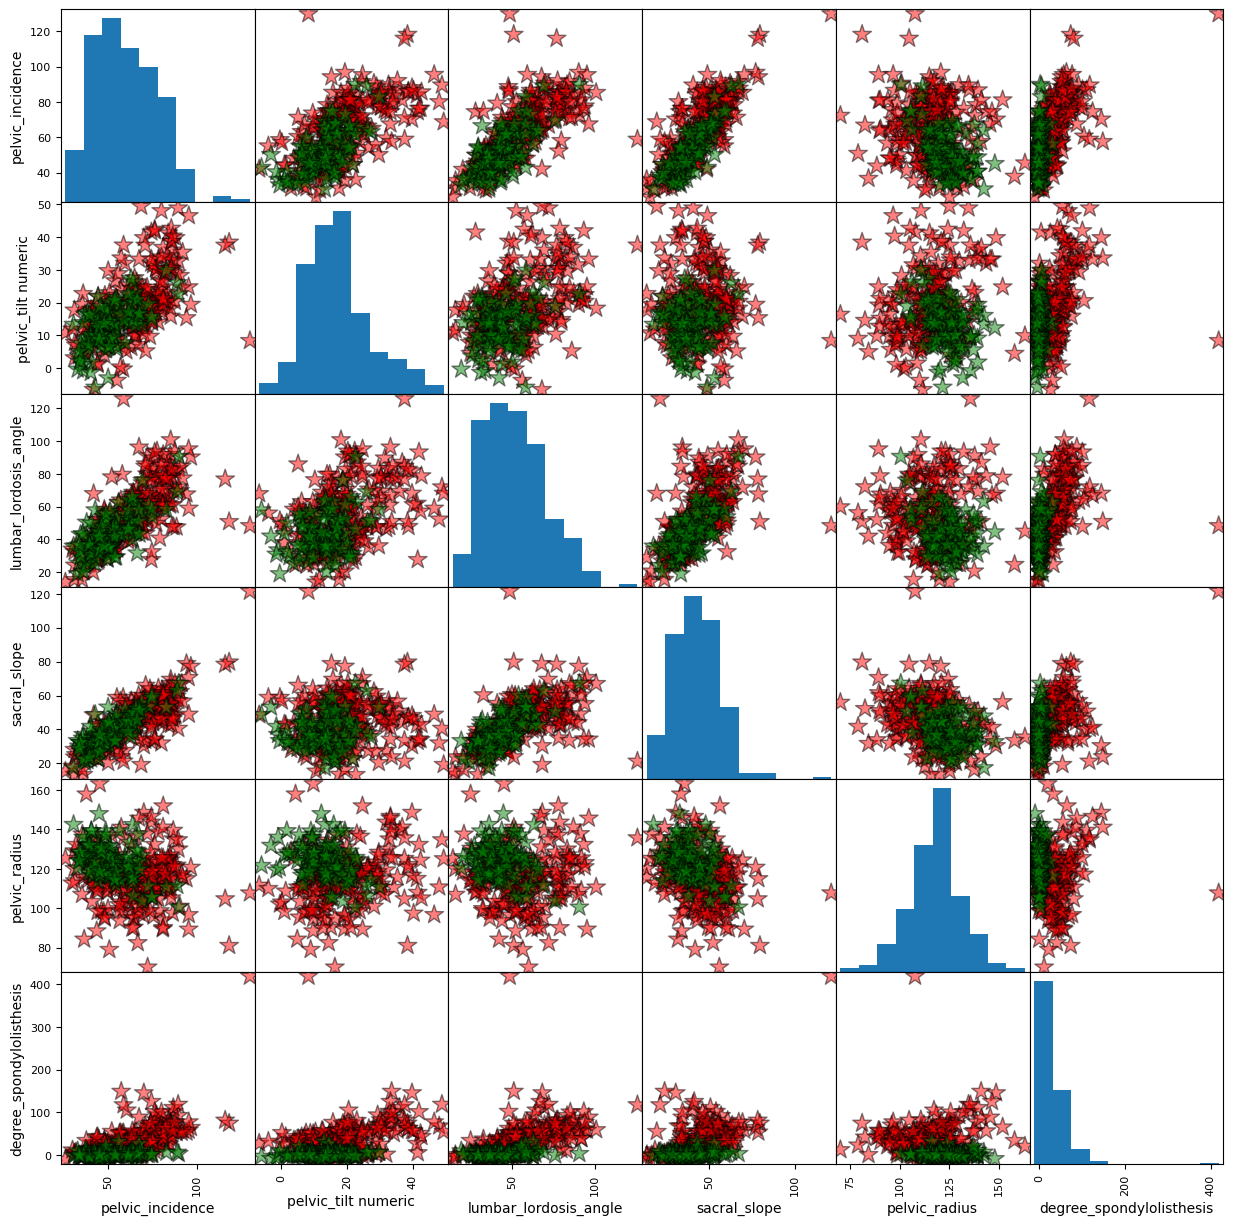

In [6]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolors= "black")
plt.show()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

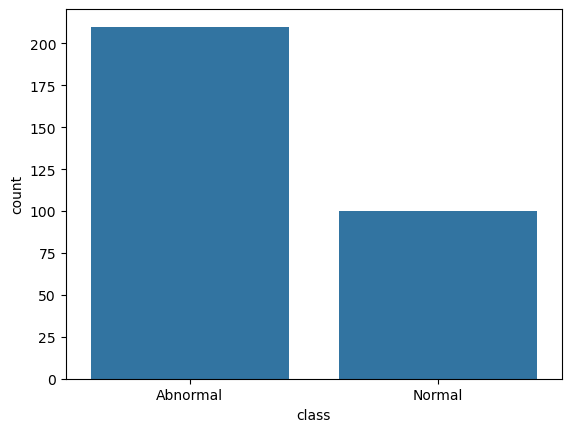

In [8]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))



Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

Therefore we need to split our data train and test sets.

* train: use train set by fitting
* test: make prediction on test set.
* With train and test sets, fitted data and tested data are completely different
* train_test_split(x,y,test_size = 0.3,random_state = 1) 

*   x: features
*   y: target variables (normal,abnormal)
*   test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
*   random_state: sets a seed. If this seed is same number,
*   train_test_split() produce exact same split at each time
fit(x_train,y_train): fit on train sets
score(x_test,y_test)): predict and give accuracy on test sets

In [9]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy


With KNN (K=3) accuracy is:  0.8602150537634409


Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity

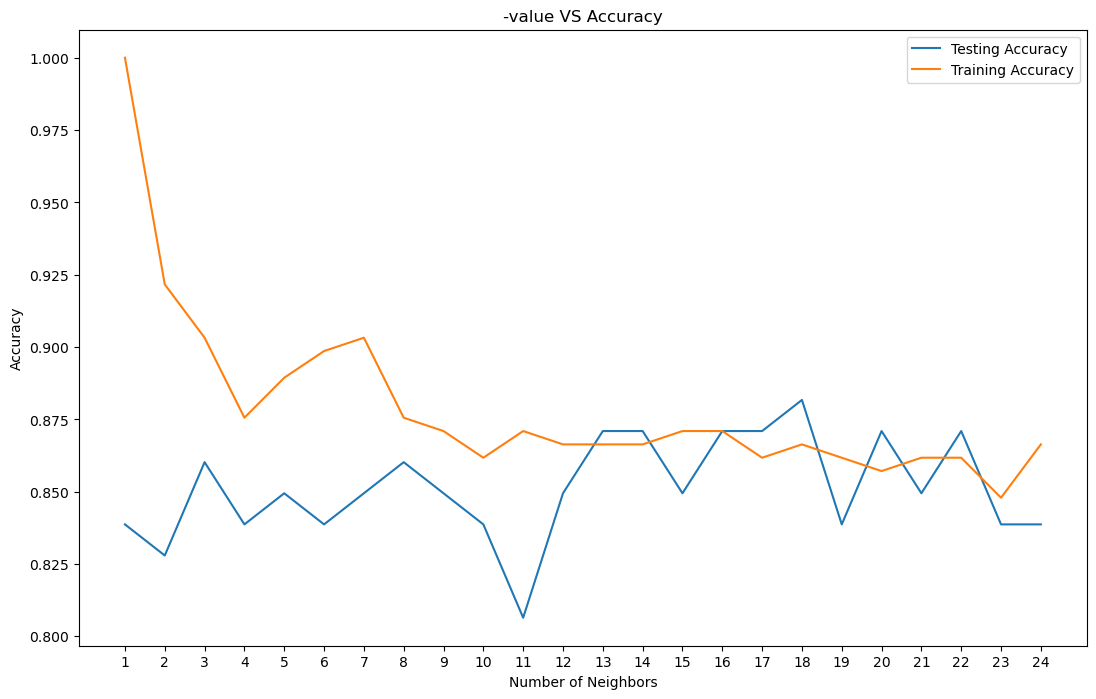

Best accuracy is 0.8817204301075269 with K = 18


In [11]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))


# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

<iframe src="https://www.kaggle.com/embed/kanncaa1/machine-learning-tutorial-for-beginners?cellIds=21&kernelSessionId=4722846" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Machine Learning Tutorial for Beginners"></iframe>

REGRESSION

Supervised learning
We will learn linear and logistic regressions
This orthopedic patients data is not proper for regression so I only use two features that are sacral_slope and pelvic_incidence of abnormal
I consider feature is pelvic_incidence and target is sacral_slope
Lets look at scatter plot so as to understand it better
reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1).

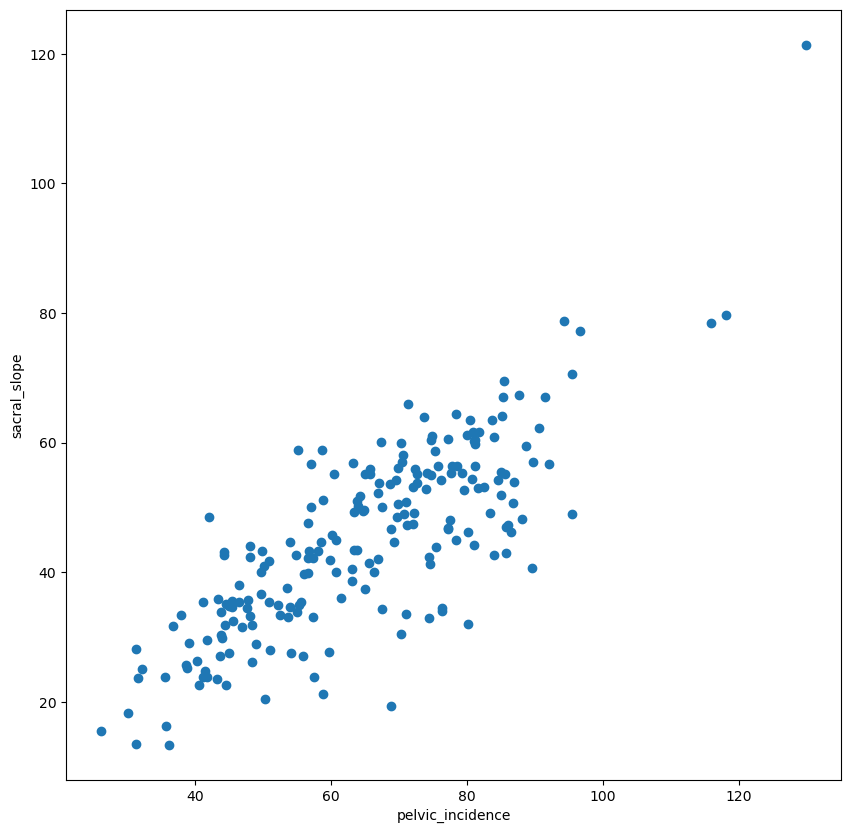

In [ ]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)

# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

<iframe src="https://www.kaggle.com/embed/kanncaa1/machine-learning-tutorial-for-beginners?cellIds=24&kernelSessionId=4722846" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Machine Learning Tutorial for Beginners"></iframe>

R^2 score:  0.6458410481075871


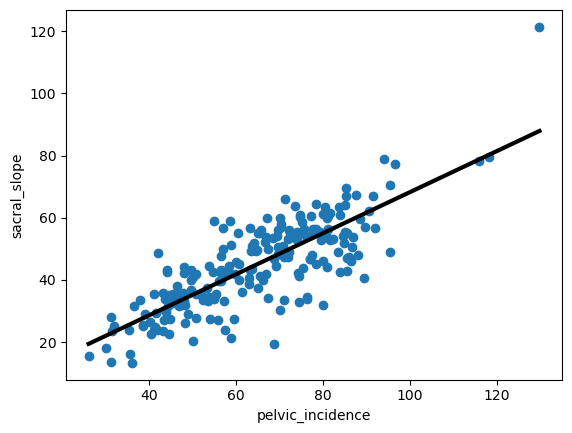

In [13]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)

# Fit
reg.fit(x,y)

# Predict
predicted = reg.predict(predict_space)

# R^2 
print('R^2 score: ',reg.score(x, y))

# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [14]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848693


Regularized Regression
As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

Ridge regression: First regularization technique. Also it is called L2 regularization.
Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
What if alpha is zero? lost function = OLS so that is linear rigression :)
If alpha is small that can cause overfitting
If alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.
Lasso regression: Second regularization technique. Also it is called L1 regularization.
Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
In order to choose feature, I add new features in our regression data

Linear vs Ridge vs Lasso First impression: Linear Feature Selection: 1.Lasso 2.Ridge Regression model: 1.Ridge 2.Lasso 3.Linear

KMEANS
* 알고리즘은 제공된 피처를 기반으로 각 데이터 포인트를 K 그룹 중 하나에 할당하기 위해 반복적으로 작동합니다. 데이터 포인트는 피처 유사성을 기반으로 클러스터링됩니다.

In [10]:
# read csv (comma separated value) into data
data = pd.read_csv('column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


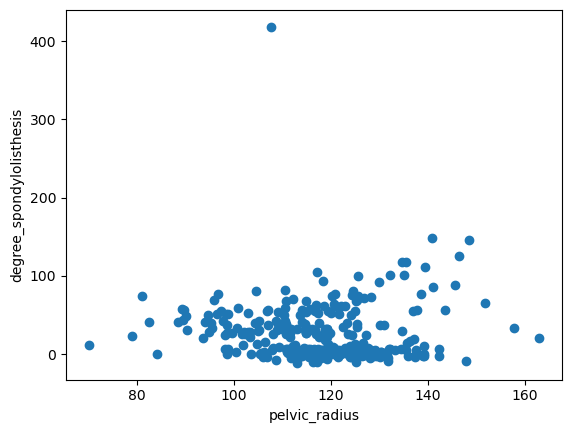

In [11]:
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


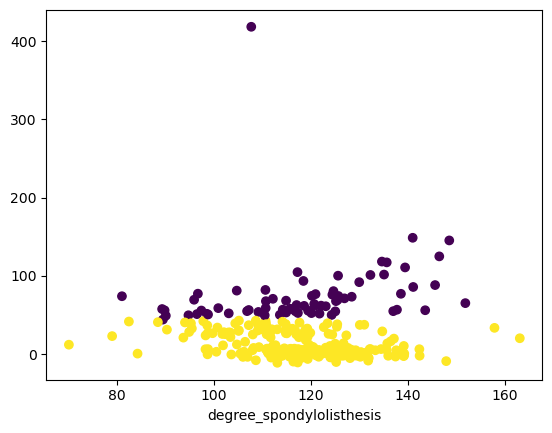

In [14]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [15]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             72       0
1            138     100


c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

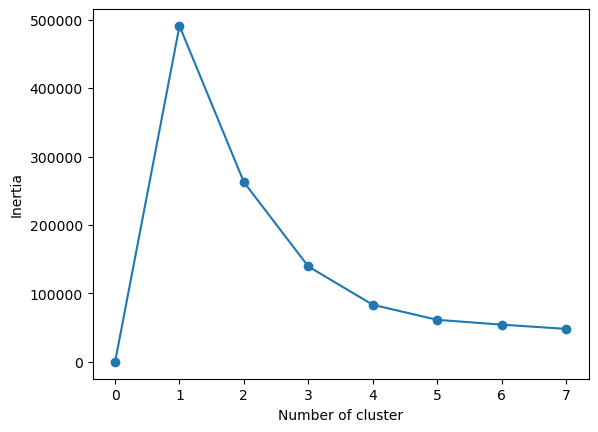

In [20]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

STANDARDIZATION

* Standardizaton is important for both supervised and unsupervised learning

*  Do not forget standardization as pre-processing
*  As we already have visualized data so you got the idea. Now we can use all features for clustering.
*  We can use pipeline like supervised learning.

In [2]:
data = pd.read_csv('column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

NameError: name 'pd' is not defined

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             93      90
1            117      10


c:\Users\stakk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


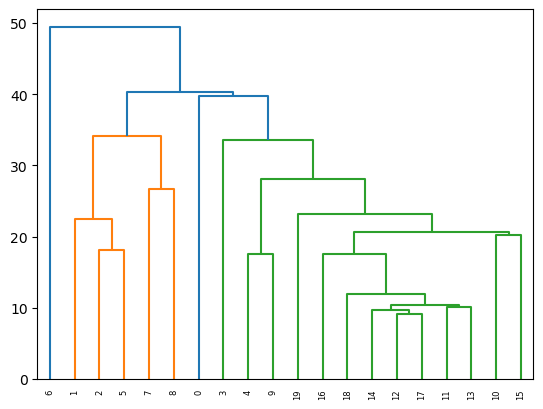

In [25]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

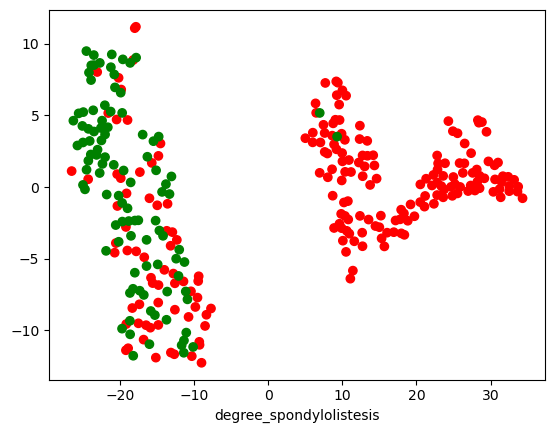

In [16]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data2)
x = transformed[:, 0]
y = transformed[:, 1]
plt.scatter(x,y,c = color_list)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolistesis')
plt.show()

    



PRINCIPLE COMPONENT ANALYSIS (PCA)

PCA : 선형 상관관계가 무관

In [19]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [ 4.76634849e-01  9.85632787e-02  5.32783979e-01  3.78071570e-01
  -3.21809199e-01 -4.82438036e-01]
 [ 1.54481282e-03  2.64657410e-01  4.96541893e-01 -2.63112598e-01
   7.74612852e-01 -1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [ 4.41703869e-01 -7.35414748e-02 -5.12024113e-01  5.15245344e-01
   5.14639730e-01 -8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08910639e-11 -5.77350269e-01
  -3.60559460e-12  3.06735539e-12]]


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

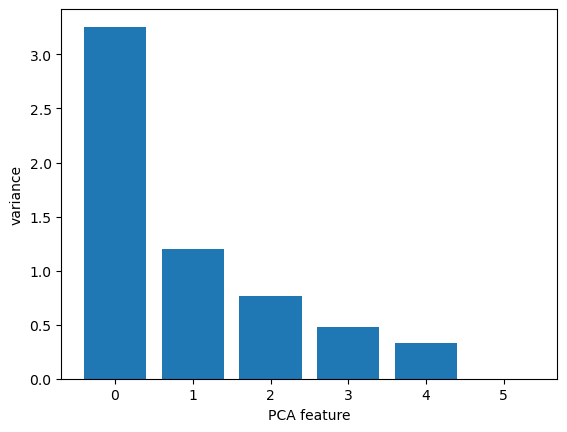

In [24]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

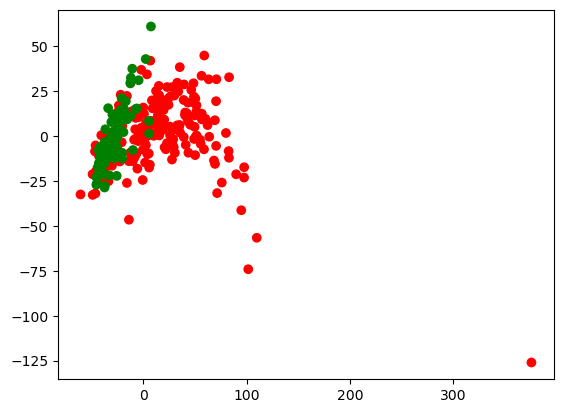

In [25]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()

차원축소
- 데이터 샘플을 회전하여 축과 정렬합니다
- 평균 0이 되도록 데이터 샘플을 이동

In [1]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

NameError: name 'data3' is not defined